<a href="https://colab.research.google.com/github/AkshayaPadigela/Heart_disease_prediction_SVM/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading data
features = ['age','sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca','thal','heartdisease']
clivelandData = pd.read_csv('/content/cleveland_heart_disease.csv', names=features)
hungarianData = pd.read_csv('/content/hungarian_heart_disease.csv', names=features)
switzerlandData = pd.read_csv('/content/swiss_heart_disease.csv', names=features)

In [ ]:
datatemp=[clivelandData,hungarianData,switzerlandData]
data = pd.concat(datatemp)

In [ ]:
data = data.drop(['ca','slope','thal'],axis=1)
data = data.replace('?',np.nan)

<Axes: >

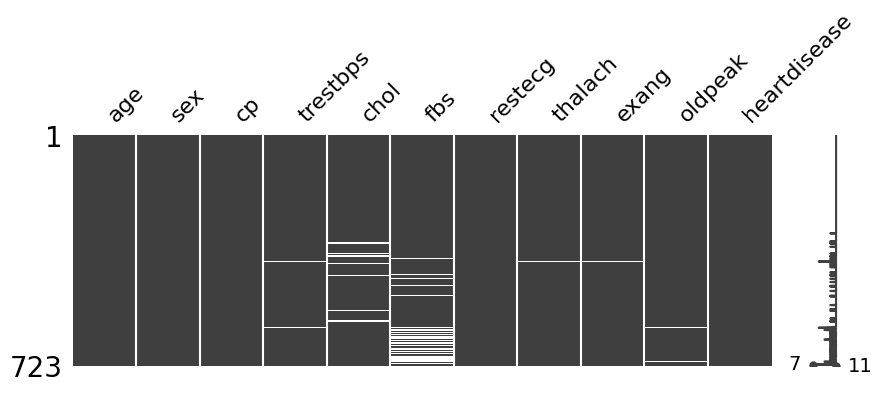

In [ ]:
#missing data detection
msno.matrix(data,figsize=(10,3))

<Axes: xlabel='sex', ylabel='heartdisease'>

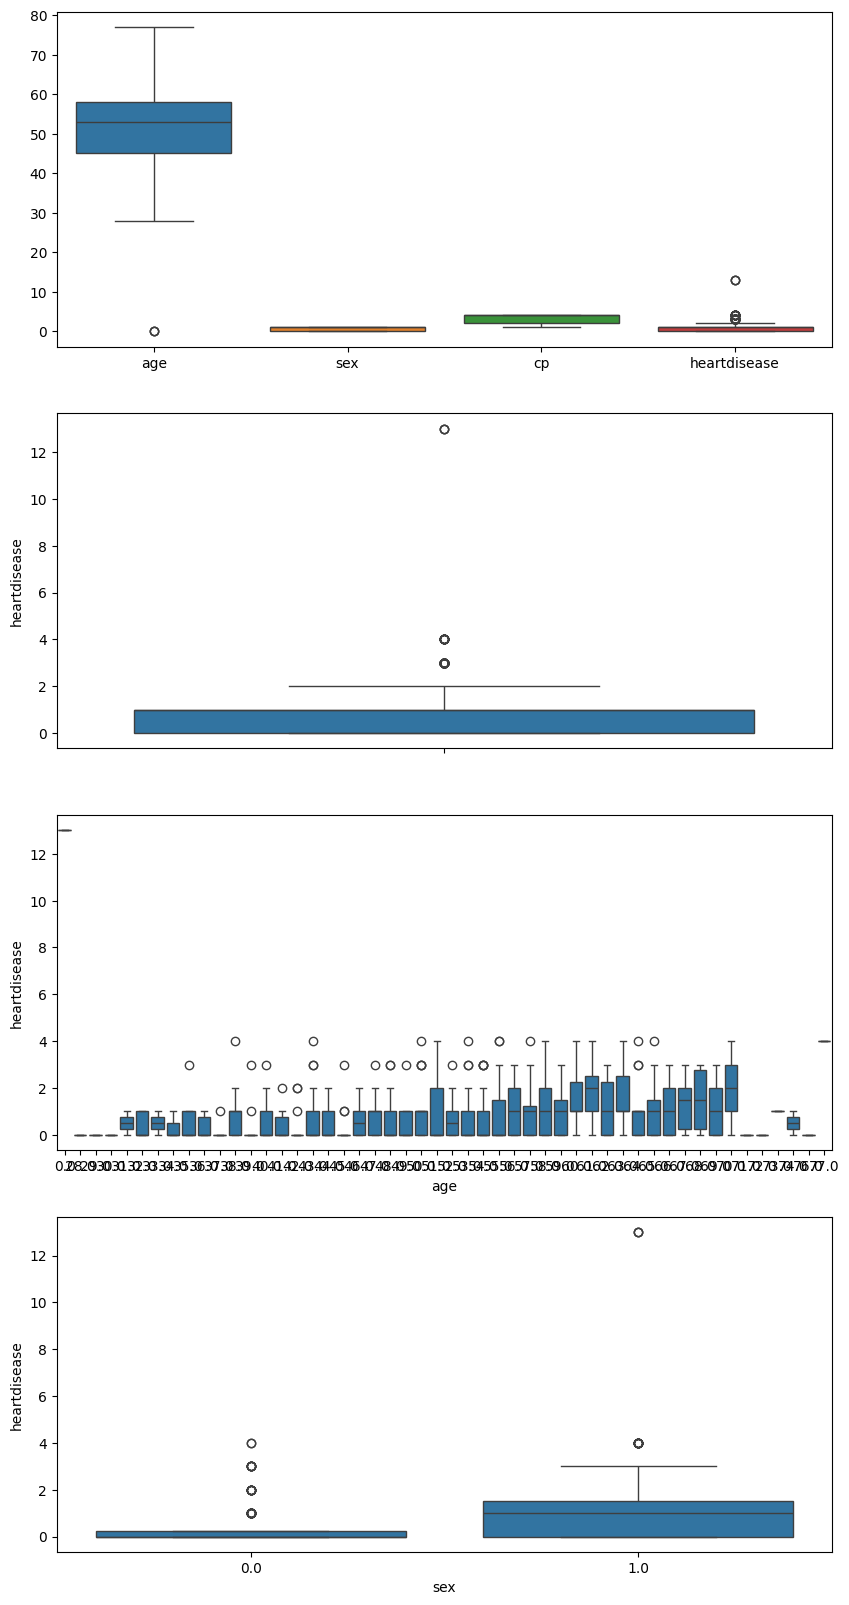

In [ ]:
# outliners detection and class imbalance
fig,axes=plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient='v',ax=axes[0])
sns.boxplot(data=data,y='heartdisease',orient = 'v',ax=axes[1])
sns.boxplot(data=data,x='age',y='heartdisease',orient = 'v',ax=axes[2])
sns.boxplot(data=data,x='sex',y='heartdisease',orient = 'v',ax=axes[3])


<Axes: >

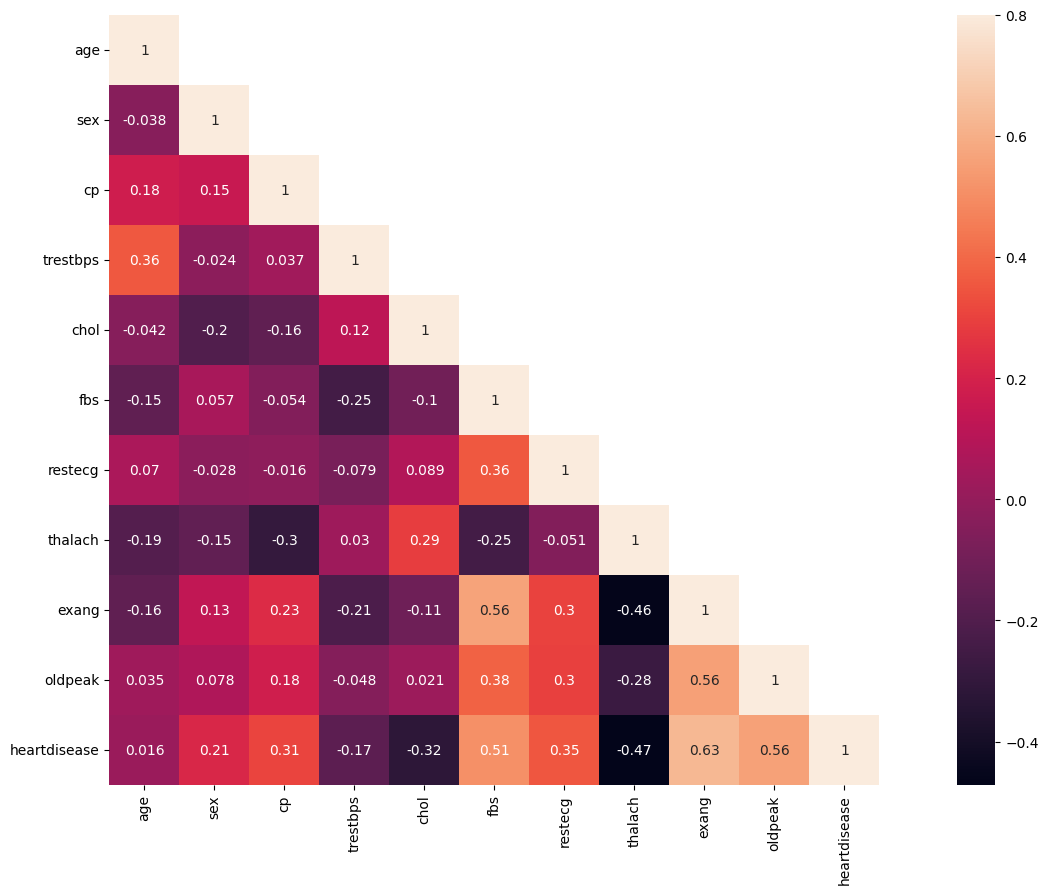

In [ ]:
#correlation analysis
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,vmax=.8,square=True,annot=True)